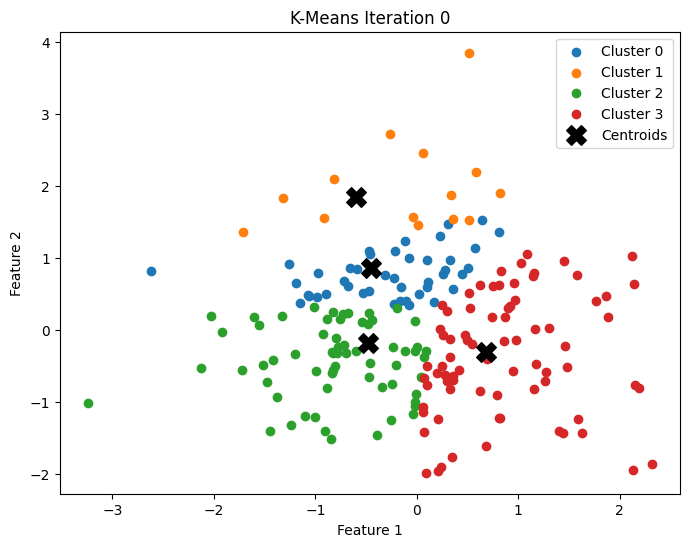

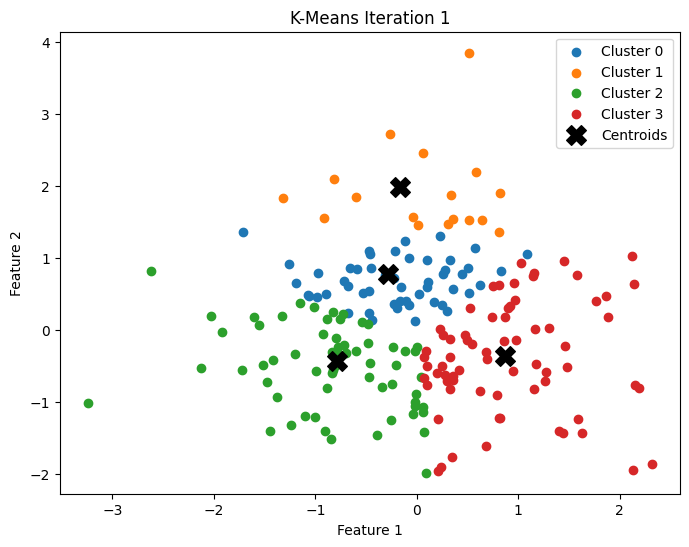

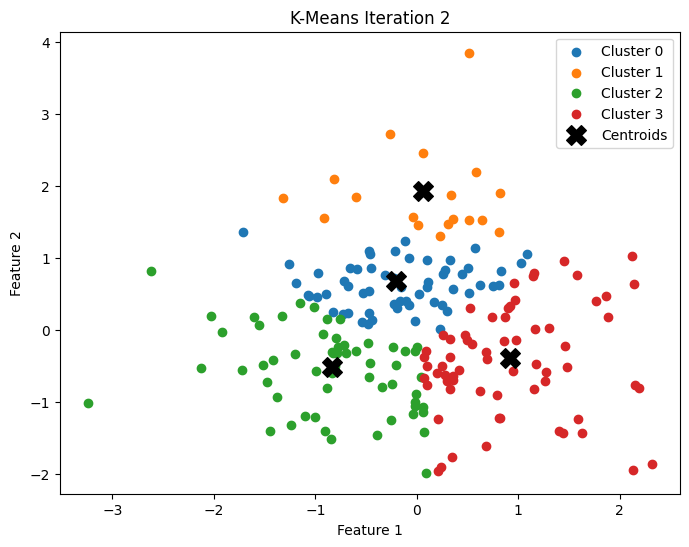

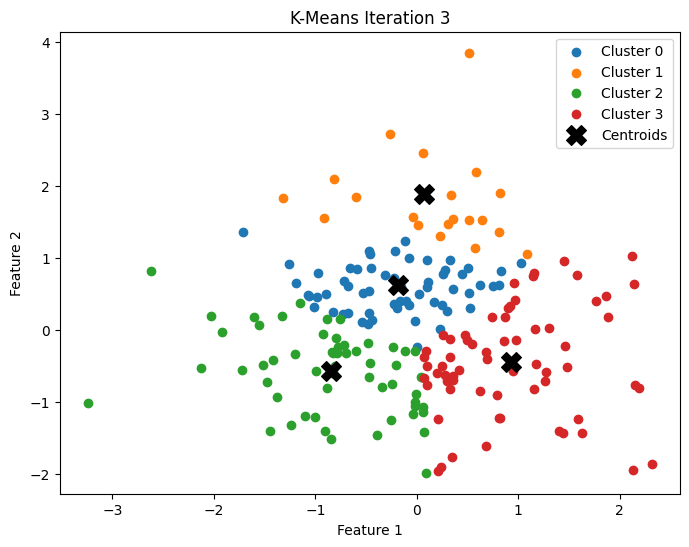

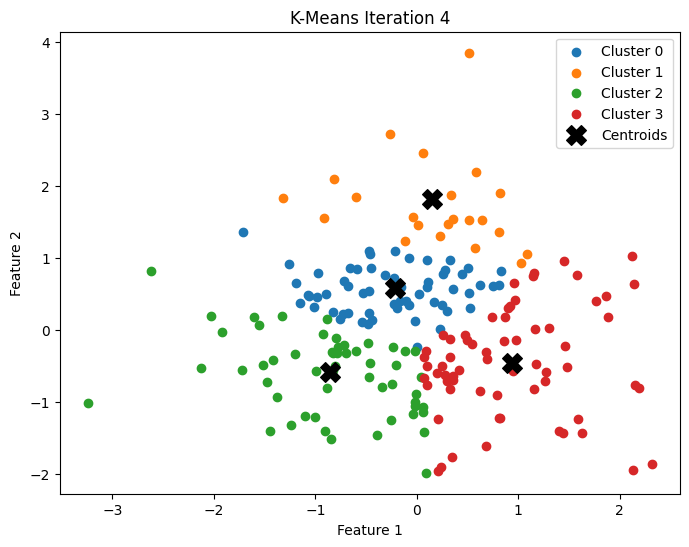

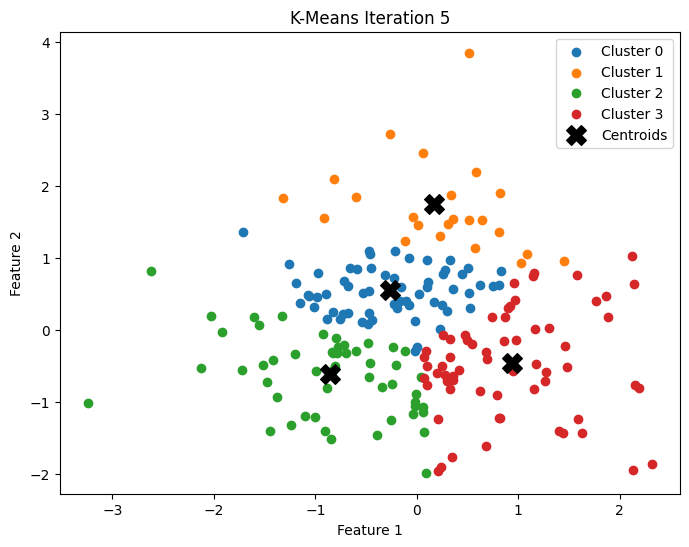

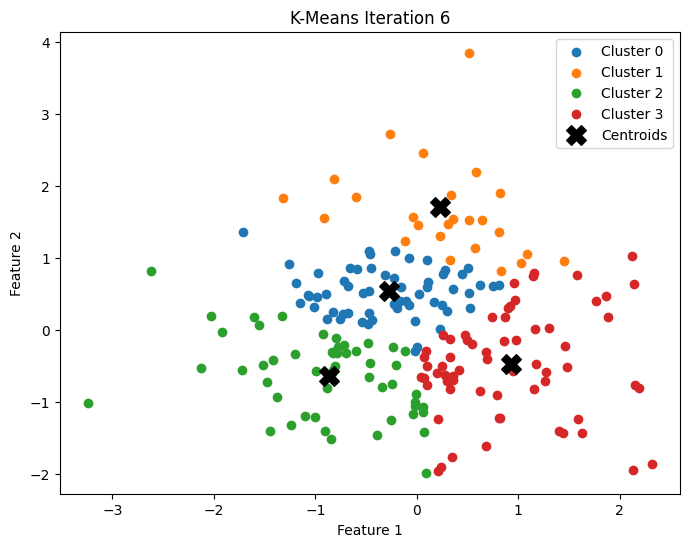

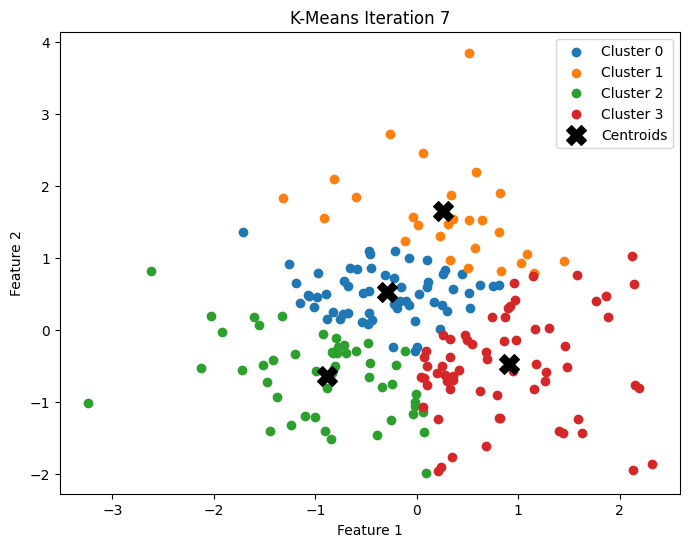

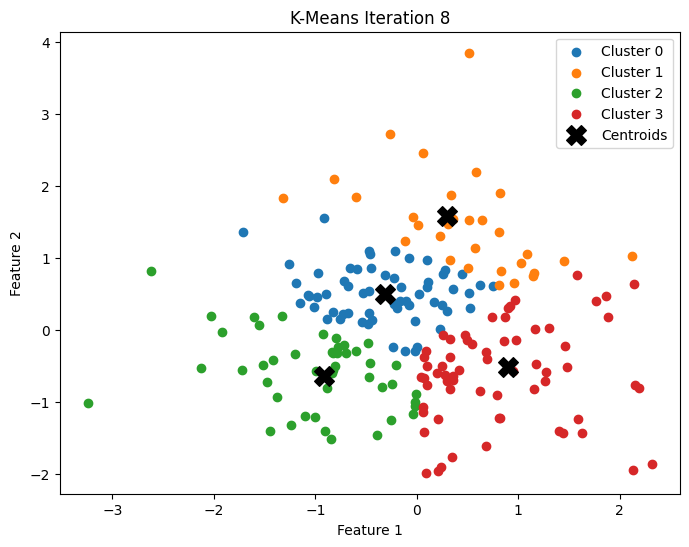

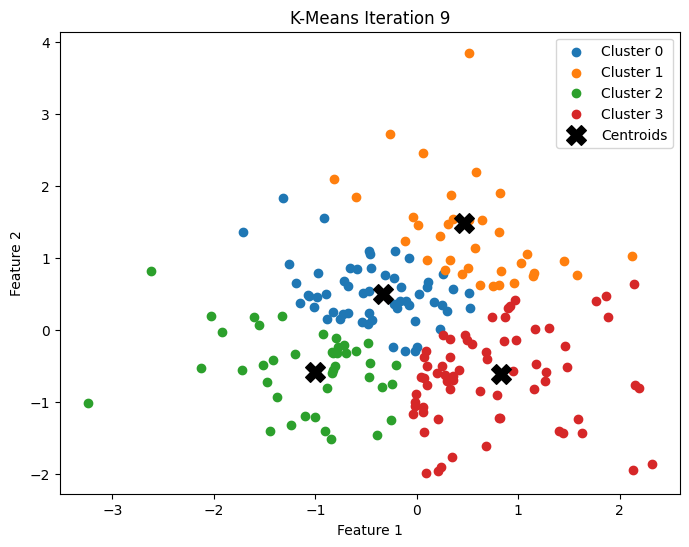

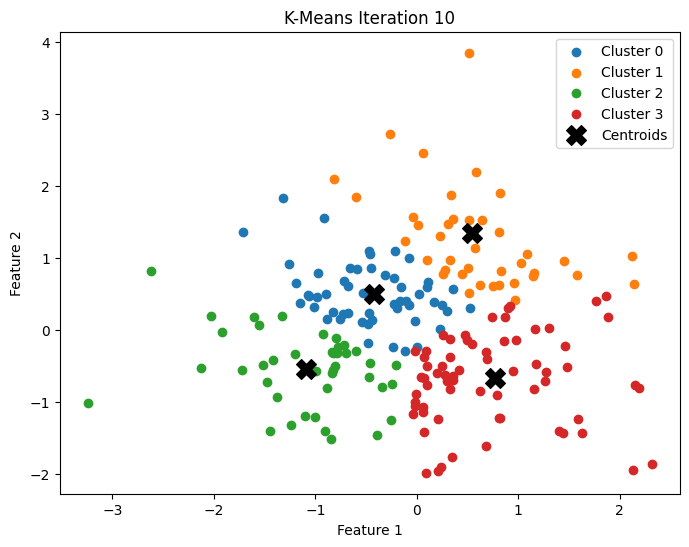

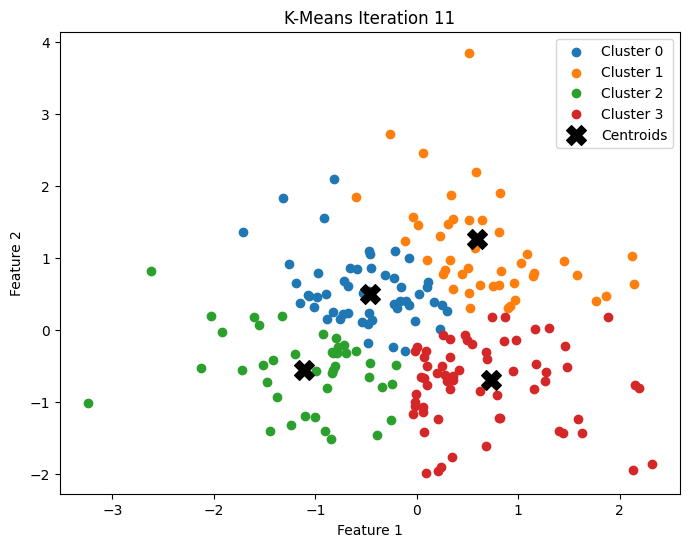

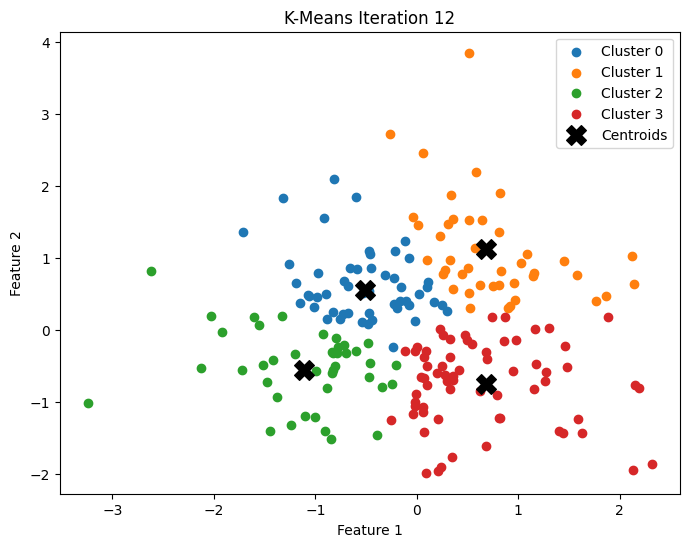

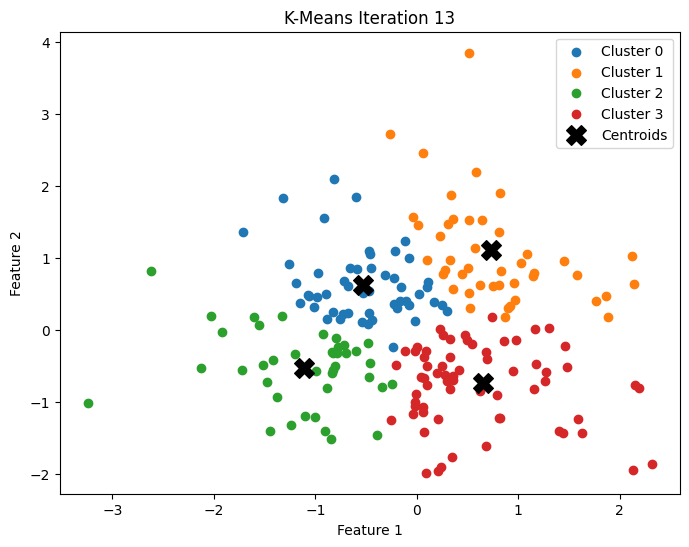

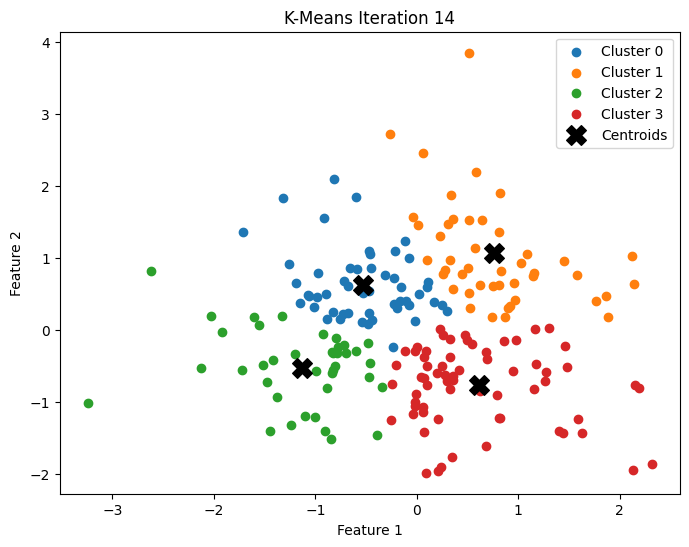

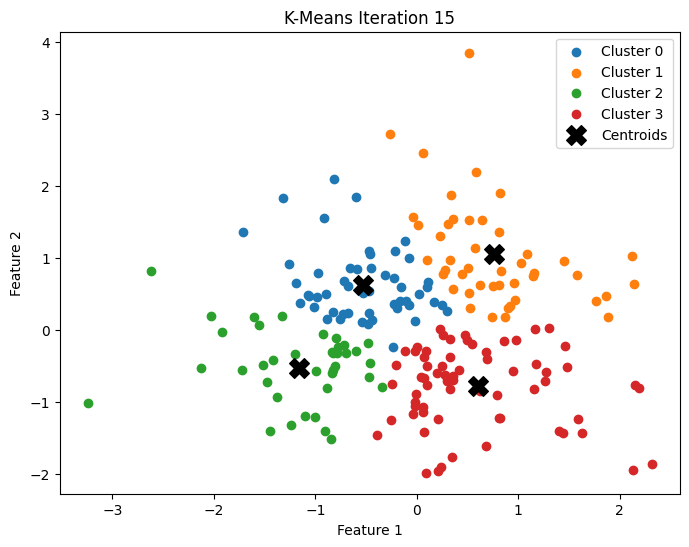

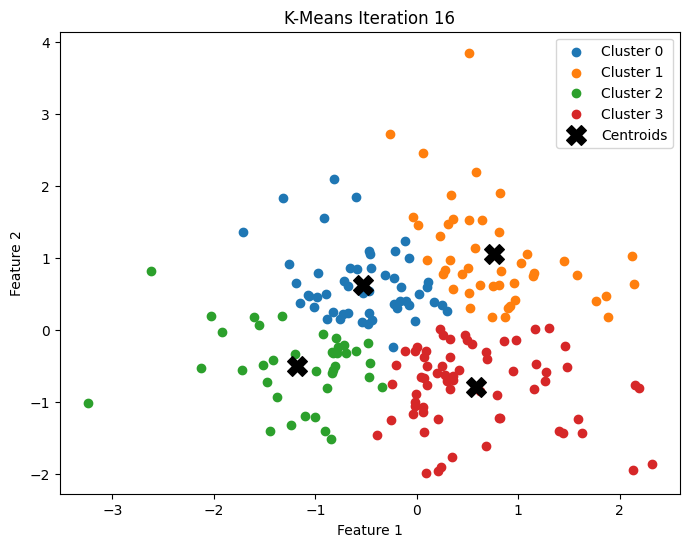

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Generate synthetic dataset
def generate_data(n_samples=200, n_features=2):
    np.random.seed(42)
    return np.random.randn(n_samples, n_features)

# Step 2: Implement K-Means Clustering with Iteration Visualization
class KMeans:
    def __init__(self, k=3, max_iters=100, save_plots=False, output_dir="kmeans_iterations"):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.save_plots = save_plots
        self.output_dir = output_dir
        
        if self.save_plots and not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
    
    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for iteration in range(self.max_iters): 
            labels = self._assign_clusters(X)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            
            self.plot_clusters(X, labels, self.centroids, iteration)
            
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        
        self.labels_ = self._assign_clusters(X)
    
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def plot_clusters(self, X, labels, centroids, iteration):
        plt.figure(figsize=(8, 6))
        for i in range(self.k):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
        plt.title(f'K-Means Iteration {iteration}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        
        if self.save_plots:
            filename = os.path.join(self.output_dir, f'iteration_{iteration}.png')
            plt.savefig(filename)
        
        plt.show()
        plt.close()

# Step 3: Run K-Means and visualize iterations
def main():
    X = generate_data(n_samples=200)
    kmeans = KMeans(k=4, save_plots=True)  # Toggle save_plots on/off
    kmeans.fit(X)

if __name__ == "__main__":
    main()
